# <font color='blue'> Cours Science de données - IFRISSE 2020 - PART3</font>

# Dans cette partie de notre étude, nous verons construire un modèle de Machine Learning et comment l'évaluer

# II - Construction de modèle de ML et Évaluation

# Titanic Data Science Solutions


### This notebook is a companion to the book [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312). 

## Cheminement

Le flux de solutions du concours passe par six étapes décrites dans le livre Data Science Solutions.

1. Définition de la question ou du problème.
2. Acquisition des données d'entrainement et de test.
3. Préparer, nettoyer les données.
4. Analyser, identifier des modèles et explorer les données.
5. Modéliser, prévoir et résoudre le problème.
6. Visualiser, rapporter et présenter les étapes de résolution du problème et la solution finale.


Les différentes étapes indiquent la séquence générale de la façon dont chaque étape peut se succéder. 

- Il est possible de combiner plusieurs étapes du flux de travail. Nous pouvons analyser en visualisant les données.
- Effectuer une étape plus tôt qu'indiqué. Nous pouvons analyser les données avant et après une disscussin.
- Effectuer une étape plusieurs fois. La visualisation d'une étape peut être utilisée plusieurs fois.
- Abandonner complètement une étape. 



## Questionnement et Problème

Les sites de compétition comme Kaggle définissent le problème à résoudre ou les questions à poser tout en fournissant les ensembles de données pour construire votre modèle scientifique et tester les résultats du modèle par rapport à un ensemble de données test. La définition de la question ou du problème pour la compétition Titanic Survival est [décrite ici à Kaggle] (https://www.kaggle.com/c/titanic).

> En se basant sur un ensemble d'échantillons d'entraînement répertoriant les passagers qui ont survécu ou non à la catastrophe du Titanic, notre modèle peut-il déterminer, sur la base d'un ensemble de données de test donné ne contenant pas les informations relatives à la survie, si ces passagers ont survécu ou non.

Nous pouvons également vouloir développer une compréhension précoce du domaine de notre problème. Ceci est décrit sur la [page de description du concours Kaggle ici] (https://www.kaggle.com/c/titanic). Voici les points forts à noter.

- Le 15 avril 1912, lors de son voyage inaugural, le Titanic a coulé après avoir heurté un iceberg, tuant 1502 des 2224 passagers et membres d'équipage. Traduit 32 % de taux de survie.
- L'une des raisons pour lesquelles le naufrage a entraîné de telles pertes de vie est qu'il n'y avait pas assez de canots de sauvetage pour les passagers et l'équipage.
- Bien qu'il y ait eu une part de chance pour survivre au naufrage, certains groupes de personnes avaient plus de chances de survivre que d'autres.



## Le travail d'ingénierie pouvant être mise en place pour l'atteinte des objectifs en Science de données

Les réponses généralement apportées par la science de données d'une étude peuvent être catégorisées en setp points.

**Faire une Classification** : Nous pouvons vouloir classer ou catégoriser nos échantillons

**Étudier une Correlation** : On peut aborder le problème en fonction des cratéristiques disponibles dans l'ensemble de données d'apprentissage. Quelles sont les caractéristiques de l'ensemble de données qui contribuent de manière significative à notre objectif de solution ? Statistiquement parlant, y a-t-il une [corrélation] (https://en.wikiversity.org/wiki/Correlation) entre une caractéristique et l'objectif de la solution ? Lorsque les valeurs des caractéristiques changent, l'état de la solution change-t-il également, et vice-versa ? Cela peut être testé à la fois pour les caractéristiques numériques et catégorielles dans l'ensemble de données donné. Nous pouvons également vouloir déterminer la corrélation entre les caractéristiques autres que la survie. La corrélation de certaines caractéristiques peut aider à créer, compléter ou corriger des caractéristiques.

**Réaliser des conversion** : Pour l'étape de modélisation, il faut préparer les données. Selon l'algorithme de modélisation choisi, il peut être nécessaire de convertir toutes les caractéristiques en valeurs numériques équivalentes. Par exemple, la conversion des valeurs textuelles catégorielles en valeurs numériques.

**De faire des ajouts/suppressions** : La préparation des données peut également nécessiter l'estimation de toute valeur manquante dans une caractéristique. Les algorithmes de modèle peuvent fonctionner au mieux lorsqu'il n'y a pas de valeurs manquantes.

**De faire des corrections** : Nous pouvons également analyser l'ensemble de données d'apprentissage donné pour détecter les erreurs ou les valeurs éventuellement inexactes dans les caractéristiques et essayer de corriger ces valeurs ou d'exclure les échantillons contenant les erreurs. Une façon de le faire est de détecter toute valeur aberrante parmi nos échantillons ou caractéristiques. Nous pouvons également éliminer complètement une caractéristique si elle ne contredit pas l'analyse ou si elle peut fausser les résultats de manière significative.

**Créer de nouvelles entrées** : Nous pouvons créer de nouvelles caractéristiques sur la base d'une caractéristique existante ou d'un ensemble de caractéristiques, de sorte que la nouvelle caractéristique respecte les objectifs de corrélation, de conversion et d'exhaustivité.

**Faire de graphique** : Comment sélectionner les bons graphiques de visualisation en fonction de la nature des données et des objectifs de la solution.

In [213]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Acquisition des données

Les librairies Python Pandas nous aident à manipuler nos de données. Nous commençons par acquérir les ensembles de données d'entrainement et de test dans des DataFrames. Nous combinons également ces ensembles de données pour effectuer certaines opérations sur les deux ensembles de données ensemble. À noter que les données de test et d'apprentissage ont déjà été défini

In [214]:
# chargement de données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
# concatener les données de train et de test pour ovoir la donnée initiale
combine = [train_df, test_df]

## Analyser en décrivant les données

Pandas aide également à décrire les ensembles de données répondant aux questions suivantes au début de notre projet.

**Quelles sont les variables caractéristiques disponibles dans l'ensemble de données ?

In [215]:
print(train_df.columns.values)

train_df.shape

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


(891, 12)

* survie -> Survie 0 = Non, 1 = Oui
* pclass -> classe du Billet  1 = 1er, 2 = 2ème, 3 = 3ème
* sexe -> Sexe	
* Âge ->  Âge en années	
* sibsp ->  de frères et soeurs / conjoints à bord du Titanic	
* parche ->  de parents / enfants à bord du Titanic	
* ticket -> Numéro du billet	
* fare -> Tarifs passagers	
* cabine -> Numéro de cabine	
* embarked -> Lieu d'embarquement C = Cherbourg, Q = Queenstown, S = Southampton

**Quelles variables caractéristiques  sont catégorielles?**

Ces valeurs permettent de classer les échantillons en ensembles d'échantillons similaires. 

- Catégorielle : Survécu, Sexe et Embarqué. Ordinal : Pclasse.

**Quelles variables caractéristiques sont numériques ?

Quelles sont les caractéristiques numériques ? Ces valeurs varient d'un échantillon à l'autre. Dans les caractéristiques numériques, les valeurs sont-elles discrètes, continues ou basées sur des séries temporelles ? 

- Continue : Âge, tarif. Discrètes : SibSp, Parch.

In [216]:
# preview the data
train_df[:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Quelles sont les caractéristiques des types de données mixtes ?**

Données numériques et alphanumériques au sein d'une même caractéristique. Ce sont des candidats pour la correction de l'objectif.

- Le ticket est un mélange de types de données numériques et alphanumériques. La cabine est alphanumérique.

**Quelles sont les caractéristiques qui peuvent contenir des erreurs ou des fautes de frappe ?

Il est plus difficile d'examiner ces données pour un grand ensemble de données, mais la vérification de quelques échantillons d'un ensemble de données plus petit peut nous indiquer clairement quelles caractéristiques doivent être corrigées.

- La caractéristique "Nom" peut contenir des erreurs ou des fautes de frappe car il existe plusieurs façons de décrire un nom, notamment les titres, les parenthèses rondes et les guillemets utilisés pour les noms alternatifs ou courts.

In [217]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Quelles caractéristiques contiennent des valeurs manquantes, nulles ou vides ?

Ces éléments devront être corrigés.

- Cabine > Âge > Les caractéristiques embarquées contiennent un certain nombre de valeurs nulles dans cet ordre pour l'ensemble de données d'entrainement.

- Cabine > Âge sont incomplètes dans le cas de l'ensemble de données de test.

**Quels sont les types de données pour les différentes caractéristiques ?

Aidez-nous lors de la conversion de l'objectif.

- Sept caractéristiques sont des nombres entiers ou des valeurs flottantes. Six dans le cas d'un jeu de données de test.
- Cinq caractéristiques sont des chaînes de caractères (objet).

In [218]:
train_df.info()
print('#'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**Quelle est la répartition des valeurs numériques des caractéristiques entre les échantillons ?**

Cela nous aide à déterminer, entre autres, dans quelle mesure l'ensemble des données d'entrainement est représentatif dans notre étude.

- Le nombre total d'échantillons s'élève à 891, soit 40 % du nombre réel de passagers à bord du Titanic (2 224).
- Le nombre de survivants est une caractéristique catégorielle avec des valeurs de 0 ou 1.
- Environ 38% des échantillons ont survécu, ce qui est représentatif du taux de survie réel de 32%.
- La plupart des passagers (> 75 %) n'ont pas voyagé avec des parents ou des enfants.
- Près de 30 % des passagers avaient des frères et sœurs et/ou leur conjoint à bord.
- Les tarifs variaient considérablement, peu de passagers (<1%) payant jusqu'à 512 $.
- Peu de passagers âgés (<1%) dans la tranche d'âge 65-80 ans.

In [219]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Quelle est la répartition des caractéristiques catégorielles?**

- Les noms sont uniques dans l'ensemble des données (nombre=unique=891)
- Variable sexe comme deux valeurs possibles avec 65% d'hommes (top=hommes, freq=577/count=891).
- Les valeurs de la cabine ont plusieurs doublons dans les échantillons. Par ailleurs, plusieurs passagers ont partagé une cabine.
- Embarqué prend trois valeurs possibles. Port S utilisé par la plupart des passagers (top=S)
- La caractéristique du billet présente un ratio élevé (22 %) de valeurs en double (unique=681).

In [220]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Daly, Mr. Eugene Patrick",male,347082,G6,S
freq,1,577,7,4,644


<AxesSubplot:>

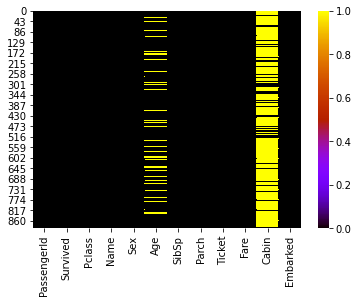

In [221]:
import seaborn as sns
# verifier les valeurs manquantes
sns.heatmap(train_df.isna(),cmap='gnuplot')

### Hypothèses basées sur l'analyse des données

Nous arrivons aux hypothèses suivantes sur la base de l'analyse des données effectuée jusqu'à présent. Nous pouvons valider ces hypothèses de manière plus approfondie avant de prendre les mesures appropriées.

**Corrélation.**

Nous voulons savoir dans quelle mesure chaque caractéristique est en corrélation avec la survie. Nous voulons le faire au début de notre projet et faire correspondre ces corrélations rapides avec les corrélations modélisées plus tard dans le projet.

**Compléter.**

1. Nous pourrions vouloir compléter la fonctionnalité Age car elle est définitivement corrélée à la survie.
2. Nous pouvons vouloir compléter la fonction Embarqué car elle peut aussi être corrélée avec la survie ou une autre fonction importante.

**Corriger.**

1. La fonction de ticket peut être supprimée de notre analyse car elle contient un ratio élevé de doublons (22 %) et il peut ne pas y avoir de corrélation entre le ticket et la survie.
2. La caractéristique de la cabine peut être supprimée car elle est très incomplète ou contient de nombreuses valeurs nulles tant dans l'ensemble des données de formation que dans celui des tests.
3. Le PassengerId peut être supprimé de l'ensemble de données de formation car il ne contribue pas à la survie.
4. La fonction de nom est relativement non standard, elle peut ne pas contribuer directement à la survie, donc elle peut être supprimée.

**Créer.**

1. Nous pourrions créer une nouvelle fonctionnalité appelée Famille basée sur Parch et SibSp pour obtenir le nombre total de membres de la famille à bord.
2. Nous pouvons vouloir créer la fonction Nom pour extraire le Titre comme nouvelle fonction.
3. Nous pourrions créer une nouvelle fonction pour les tranches d'âge. Cela transforme une caractéristique numérique continue en une caractéristique catégorielle ordinale.
4. Nous pouvons également créer une fonction de fourchette tarifaire si cela facilite notre analyse.

**Classification.**

Nous pouvons également ajouter à nos hypothèses basées sur la description du problème mentionnée plus haut.

1. Les femmes (Sexe=femme) ont plus de chances d'avoir survécu.
2. Les enfants (Âge< ?) ont plus de chances d'avoir survécu. 
3. Les passagers de la classe supérieure (Pclass=1) ont plus de chances d'avoir survécu.

In [222]:
df_v = train_df.groupby('Sex')['Survived'].value_counts()
df_v

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

## Analyser en pivotant les caractéristiques

Pour confirmer certaines de nos observations et hypothèses, nous pouvons rapidement analyser les corrélations entre nos caractéristiques en faisant pivoter les caractéristiques les unes par rapport aux autres. Nous ne pouvons le faire à ce stade que pour les caractéristiques qui n'ont pas de valeurs vides. Il est également logique de ne le faire que pour les caractéristiques de type catégorique (sexe), ordinal (classe P) ou discret (SibSp, parche).

- Nous observons une corrélation significative (>0,5) entre Pclass=1 et Survived (classification #3). Nous décidons d'inclure cette caractéristique dans notre modèle.
- **Sexe** Nous confirmons l'observation faite lors de la définition du problème, à savoir que Sexe=femelle avait un taux de survie très élevé à 74% (classification #1).
- **SibSp et Parch** Ces caractéristiques ont une corrélation nulle pour certaines valeurs. Il peut être préférable de dériver une caractéristique ou un ensemble de caractéristiques à partir de ces caractéristiques individuelles (création de #1).

In [223]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [224]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [225]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [226]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyser en visualisant les données

Nous pouvons maintenant continuer à confirmer certaines de nos hypothèses en utilisant des visualisations pour analyser les données.

### Corrélation des caractéristiques numériques

Commençons par comprendre les corrélations entre les caractéristiques numériques et l'objectif que nous recherchons (Survived).

Un histogramme est utile pour analyser des variables numériques continues comme l'âge, où des bandes ou des plages aideront à identifier des modèles utiles. 

Cela nous aide à répondre aux questions relatives à des intervalles spécifiques (les enfants ont-ils un meilleur taux de survie ?)

Notez que l'axe des x dans les visualisations de l'histogramme représente le nombre d'échantillons ou de passagers.

**Observations.**

- Les enfants (âge <=4 ans) avaient un taux de survie élevé.
- Les passagers les plus âgés (âge = 80 ans) ont survécu.
- Un grand nombre de jeunes de 15 à 25 ans n'ont pas survécu.
- La plupart des passagers sont dans la tranche d'âge 15-35 ans.

**Décisions.**

Cette simple analyse confirme nos hypothèses en tant que décisions pour les étapes suivantes du projet.

- Nous devrions tenir compte de l'âge (notre hypothèse de classification #2) dans notre modèle d'entrainement.
- Complétez la fonction Age pour les valeurs nulles (en complétant le n°1).
- Nous devrions regrouper les groupes d'âge (en créant le #3).

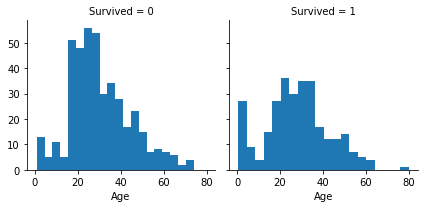

In [227]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Corrélation entre les caractéristiques numériques et ordinales

Nous pouvons combiner plusieurs caractéristiques pour identifier des corrélations en utilisant une seule parcelle. Cela peut être fait avec des caractéristiques numériques et catégorielles qui ont des valeurs numériques.

**Observations.**

- La classe P=3 a accueilli la plupart des passagers, mais la plupart n'ont pas survécu. Confirme notre hypothèse de classification n°2.
- Les passagers en bas âge en classe P=2 et P=3 ont pour la plupart survécu. Ce qui confirme notre hypothèse de classification n°2.
- La plupart des passagers de la classe P=1 ont survécu. Confirme notre hypothèse de classement n° 3.
- La classe P varie en fonction de la répartition des passagers par âge.

**Décisions.

- Considérer la classe P pour l'entrainement du modèles.

/home/rodrique/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


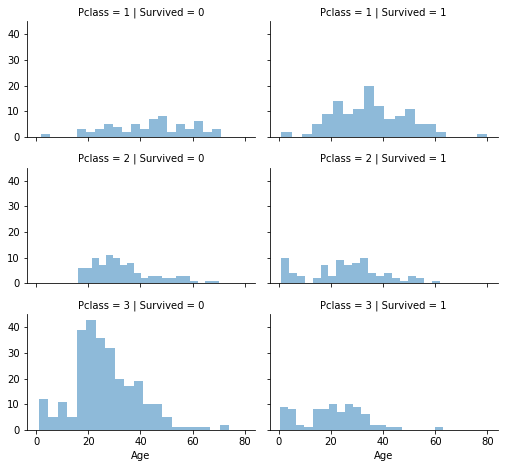

In [228]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Corrélation des caractéristiques catégorielles

Nous pouvons maintenant corréler les caractéristiques catégorielles.

**Observations.**

- Les passagers féminins avaient un taux de survie bien plus élevé que les passagers masculins. Confirme la classification (#1).
- Exception dans Embarqué=C où les hommes avaient un taux de survie plus élevé. Il pourrait s'agir d'une corrélation entre la classe P et Embarqué et, à son tour, la classe P et Survécu, mais pas nécessairement d'une corrélation directe entre Embarqué et Survécu.
- Les hommes ont eu un meilleur taux de survie dans la classe P=3 par rapport à la classe P=2 pour les ports C et Q. Achèvement (#2).
- Les ports d'embarquement ont des taux de survie variables pour la classe P=3 et parmi les passagers masculins. Corrélation (#1).

**Décisions.

- Ajouter la fonction Sexe à la formation des modèles.
- Compléter et ajouter la fonction Embarqué à la formation du modèle.

/home/rodrique/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rodrique/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/rodrique/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


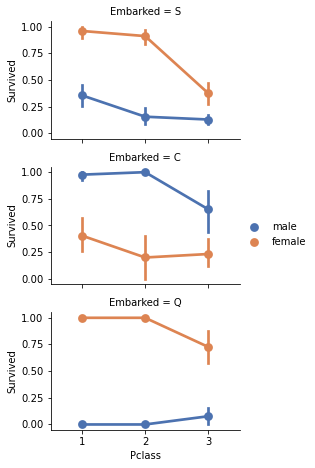

In [229]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Corrélation entre les caractéristiques catégorielles et numériques

Nous pouvons également vouloir corréler les caractéristiques catégorielles et les caractéristiques numériques. Nous pouvons envisager de corréler Embarqué (Catégorique non numérique), Sexe (Catégorique non numérique), Tarif (Numérique continu), avec Survécu (Catégorique numérique).

**Observations.**

- Les passagers payant un tarif plus élevé ont mieux survécu. Confirme notre hypothèse pour la création (#4) de fourchettes tarifaires.
- Le port d'embarquement est en corrélation avec les taux de survie. Confirme la corrélation (n° 1) et en complétion (n° 2).

**Décisions.**

- Envisager l'ajout de la caractéristique tarifaire.

/home/rodrique/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rodrique/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


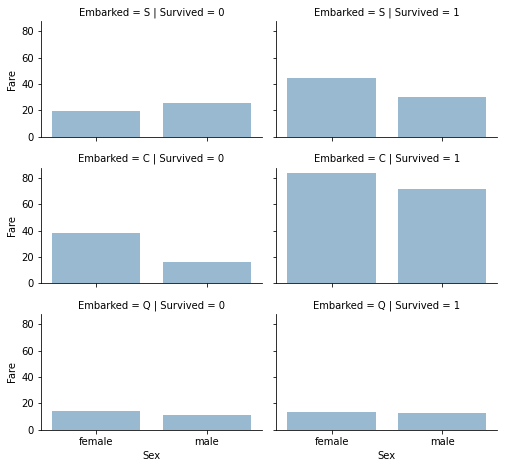

In [230]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Données erronées

Nous avons recueilli plusieurs hypothèses et décisions concernant nos ensembles de données et les sugegestions sur les variables pouvant contribuer à construire un bon modèle. Jusqu'à présent, nous n'avons pas eu à modifier une seule caractéristique ou valeur pour y parvenir.

### Corriger en supprimant des caractéristiques

C'est un bon objectif de départ à réaliser. En supprimant des caractéristiques, nous traitons moins de données. Cela accélère notre notebook et facilite l'analyse.

Sur la base de nos hypothèses et décisions, nous voulons supprimer les fonctions Cabine (correction n° 2) et Billet (correction n° 1).

Notez que, le cas échéant, nous effectuons les opérations sur les deux ensembles de données (entrainement et de test) ensemble pour rester cohérent.

In [231]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### Création d'une nouvelle variables/caractéristiq à partir d'uune caractéristique existante

Nous voulons vérifier si la fonction Nom peut être conçue pour extraire les titres et tester la corrélation entre les titres et la survie, avant d'abandonner les fonctions Nom et PassengerId.

Dans le code suivant, nous extrayons la fonction Titre en utilisant des expressions régulières. Le modèle RegEx `(\w+\.)` correspond au premier mot qui se termine par un point dans Name feature. 

**Observations.

Lorsque nous trouvons le titre, l'âge et les survivants, nous notons les observations suivantes.

- La plupart des titres classent les groupes d'âge avec précision. Par exemple : Le titre principal a une moyenne d'âge de 5 ans.
- La survie entre les tranches d'âge du titre varie légèrement.
- Certains titres ont survécu (Mme, Lady, Sir) ou n'ont pas survécu (Don, Rev, Jonkheer).

**Décision.

- Nous décidons de conserver la nouvelle fonction Titre pour la construction du modèle.

In [232]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as `Rare`.

In [233]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Convertissons les variables catégorielles

In [234]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Nous pouvons maintenant supprimer sans risque la colonne "Name" des ensembles de données de train et de test. Nous n'avons pas non plus besoin de la fonction PassengerId dans l'ensemble de données d'entrainement.

In [235]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Conversion de variable 'objet' en numerique

Nous pouvons maintenant convertir les caractéristiques qui contiennent des chaînes de caractères en valeurs numériques. Ceci est requis par la plupart des algorithmes de modélisation. Cela nous aidera également à atteindre l'objectif de compléter les caractéristiques.

Commençons par convertir la caractéristique Sexe en une nouvelle caractéristique appelée Genre où femme=1 et homme=0.

In [236]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Compléter un élément numérique continu

Nous devrions maintenant commencer à estimer et à compléter les caractéristiques avec des valeurs manquantes ou nulles. Nous allons d'abord le faire pour la caractéristique "âge".

Nous pouvons envisager trois méthodes pour compléter une caractéristique numérique continue.

1. Une méthode simple consiste à générer des nombres aléatoires entre la moyenne et [l'écart-type] (https://en.wikipedia.org/wiki/Standard_deviation).

2. Une façon plus précise de deviner les valeurs manquantes consiste à utiliser d'autres caractéristiques corrélées. Dans notre cas, nous constatons une corrélation entre l'âge, le sexe et la classe P. Devinez les valeurs de l'âge en utilisant les valeurs [médianes](https://en.wikipedia.org/wiki/Median) de l'âge dans des ensembles de combinaisons de caractéristiques de classe P et de sexe. Ainsi, l'âge médian pour Pclass=1 et Gender=0, Pclass=1 et Gender=1, et ainsi de suite...

3. Combinez les méthodes 1 et 2. Ainsi, au lieu de deviner des valeurs d'âge basées sur la médiane, utilisez des nombres aléatoires entre la moyenne et l'écart-type, basés sur des ensembles de combinaisons de classes P et de genres.

Les méthodes 1 et 3 introduiront un bruit aléatoire dans nos modèles. Les résultats de plusieurs exécutions peuvent varier. Nous préférerons la méthode 2.

/home/rodrique/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


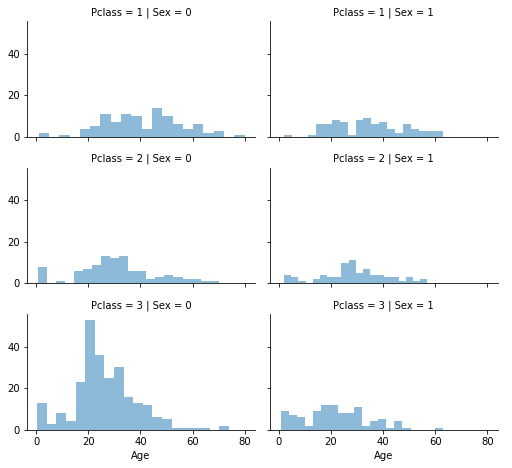

In [237]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Commençons par préparer un tableau vide pour contenir des valeurs d'âge approximatives basées sur des combinaisons de classe P x sexe.

In [191]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [192]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
#guess_df
train_df.head()

# ex: si nous avons 10 femmes en 1ère classe, et que l'âge median de ces 10 femmes == 30. 
#      Alors pour toute femme en 1ère 
#      classe dont l'âge n'est pas d"finit prendra la valeur 30.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Créons des intervalles d'âge et déterminons les corrélations avec Survived.

In [193]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Remplaçons l'âge par des ordinaux basés sur ces intervalles. #Binning

In [194]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Supprimons la colonne AgeBand.

In [195]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 

Nous pouvons créer une nouvelle variable pour FamilySize qui combine Parch et SibSp. Cela nous permettra de supprimer Parch et SibSp de nos ensembles de données.

In [238]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Nous pouvons créer une autre caractéristique IsAlone pour voir ceux qui ont suvecu en étant seul

In [239]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Supprimons maintenant Parch, SibSp, and FamilySize en faveur de IsAlone.

In [198]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Nous pouvons créer ue variable artificielle comme Age*Class, qui regroupe l'age et la class

In [199]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

La caractéristique embarquée prend les valeurs S, Q, C en fonction de la porte d'embarquement. Deux valeurs manquent dans notre ensemble de données d'entraînement. Nous les remplissons simplement avec l'occurrence la plus courante.

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

Nous pouvons maintenant convertir la variable Embarked en remplacant par de variable numérique.

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

Nous pouvons maintenant compléter la variable Fare pour une valeur manquante unique dans l'ensemble de données de test en utilisant la valeur la plus fréquente. 

Notez que nous ne créons pas de nouvelle variable intermédiaire et que nous ne faisons pas d'analyse supplémentaire de corrélation pour deviner la fonctionnalité manquante, car nous ne remplaçons qu'une seule valeur. L'objectif d'achèvement permet d'atteindre l'exigence souhaitée pour que l'algorithme du modèle fonctionne sur des valeurs non nulles.


In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Nous pouvons créer une variable FareBand, regrouper les tarifs par interval

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convertissons  Fare en fonction des valeurs de FareBand.

In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


Les données de test ressemble à ça finalement

In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Model, predict and solve

Nous sommes maintenant prêts à entrainer un modèle et à prédire la question de qui à la chance de survivre. Il existe plus de 60 algorithmes de modélisation prédictive parmi lesquels choisir. 

Nous devons comprendre le type de problème et la solution requise pour nous limiter à quelques modèles que nous pouvons évaluer. 

Le problème posé est un problème de classification et de régression. Nous voulons identifier la relation entre la sortie (Survécu ou non) avec d'autres variables ou caractéristiques (Sexe, Age, Port...). 

Nous sommes également en train de mettre au point une catégorie d'apprentissage machine appelée apprentissage supervisé, car nous formons notre modèle avec un ensemble de données donné. Avec ces deux critères - l'apprentissage supervisé plus la classification et la régression, nous pouvons réduire notre choix de modèles à quelques uns. Il s'agit notamment de

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
## DOnnées de train et de test
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
Y_test = test_df["PassengerId"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((891, 8), (891,), (418, 8), (418,))

La régression logistique est un modèle utile à appliquer dès le début du processus. La régression logistique mesure la relation entre la variable dépendante catégorielle (caractéristique) et une ou plusieurs variables indépendantes (caractéristiques) en estimant les probabilités à l'aide d'une fonction logistique, qui est la distribution logistique cumulative. Référence [Wikipédia] (https://en.wikipedia.org/wiki/Logistic_regression).

Notez le score de confiance généré par le modèle basé sur notre ensemble de données d'entrainement.

In [41]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/home/rodrique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

In [ ]:
list = [1,2,3,4,5,6,7]

v_al_train = rnd(list, 60) # 60%

v_al_test = rnd(list, 40) #40

v_al_test = list - v_al_train   #

train =  # 60% des données de la liste
test =  # 40% des données de liste

In [245]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.441994
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.336     
Dependent Variable: Survived         AIC:              803.6334  
Date:               2020-12-17 13:17 BIC:              841.9721  
No. Observations:   891              Log-Likelihood:   -393.82   
Df Model:           7                LL-Null:          -593.33   
Df Residuals:       883              LLR p-value:      3.8665e-82
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass        -0.7583    0.1107  -6.8531  0.0000  -0.9752  -0.5415
Sex            2.2939    0.2039  11.2516  0.0000   1.8943   2.

In [240]:
#define hyper parameters and ranges
param_grid_logreg = [{'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear'], 
                   'max_iter':[100, 300]}]
#apply gridsearch

grid_logreg  = GridSearchCV(logreg, param_grid=param_grid_logreg, cv=5)
#fit model with grid search
grid_logreg.fit(X_train, Y_train)
print('The best parameters for log classifier: ', grid_logreg.best_params_)

The best parameters for log classifier:  {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}


In [250]:
# Logistic Regression with hyper-parameter

logreg = LogisticRegression(C= 0.1, max_iter= 100, solver= 'lbfgs')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.81

Nous pouvons utiliser la régression logistique pour valider nos hypothèses et nos décisions en vue de la création et de la réalisation d'objectifs. Cela peut être fait en calculant le coefficient des caractéristiques dans la fonction de décision.

Les coefficients positifs augmentent les log-odds de la réponse (et donc augmentent la probabilité), et les coefficients négatifs diminuent les log-odds de la réponse (et donc diminuent la probabilité).

- Le sexe est le coefficient positif le plus élevé, ce qui signifie que plus la valeur du sexe augmente (homme : 0 à femme : 1), plus la probabilité de Survécu=1 augmente.
- Inversement, plus la classe P augmente, plus la probabilité de Survécu=1 diminue.
- De cette façon, Age*Class est une bonne caractéristique artificielle à modéliser car elle a la deuxième corrélation négative la plus élevée avec Survived.
- Il en va de même pour le titre, qui est la deuxième corrélation positive la plus élevée.

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


Ensuite, nous modélisons à l'aide de SVM qui sont des modèles d'apprentissage supervisés avec des algorithmes d'apprentissage associés qui analysent les données utilisées pour la classification et l'analyse de régression. 

Étant donné un ensemble d'échantillons d'apprentissage, chacun étant marqué comme appartenant à l'une ou l'autre de **deux catégories**, un algorithme d'apprentissage SVM construit un modèle qui assigne de nouveaux échantillons d'essai à l'une ou l'autre catégorie, ce qui en fait un classificateur linéaire binaire non probabiliste. Référence [Wikipedia] (https://en.wikipedia.org/wiki/Support_vector_machine).

Notez que le modèle génère un score de confiance qui est plus élevé que le modèle de régression logistique.

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/home/rodrique/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

In [70]:
#----------------------------------------------------------------SVM classifier
#define hyper parameters and ranges
param_grid_svc = [{'C': [100, 50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'], 
                   'kernel': ['poly', 'rbf', 'sigmoid'] }]
#apply gridsearch
grid_svc  = GridSearchCV(svc, param_grid=param_grid_svc, cv=5)
#fit model with grid search
grid_svc.fit(X_train, Y_train)
print('The best parameters for svm classifier: ', grid_svc.best_params_)

The best parameters for svm classifier:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [72]:
# Support Vector Machines

svc = SVC(C = 100, gamma= 'scale', kernel ='rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.03

En **reconnaissance de formes**, l'algorithme k-Nearest Neighbors (ou k-NN en abrégé) est une méthode non-paramétrique utilisée pour la classification et la régression. 

Un échantillon est classé par un vote majoritaire de ses voisins, l'échantillon étant affecté au cluster le plus proche (dstance, similarity) parmi ses k plus proches voisins (k est un entier positif, généralement petit). Si k = 1, alors l'objet est simplement assigné à la classe de ce seul voisin le plus proche. Référence [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

Le score de confiance KNN est meilleur que la régression logistique mais pire que le MVC.

In [257]:
knn = KNeighborsClassifier()#(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [258]:
#----------------------------------------------------------------kNN classifier
#define hyper parameters and ranges
#define hyper parameters and ranges
param_grid_knn = [{'n_neighbors': [2, 3, 4, 6, 8, 10], 'weights': [ 'uniform', 'distance'], 
                   'metric': ['euclidean', 'manhattan', 'minkowski']}]
#apply gridsearch
grid_knn  = GridSearchCV(knn, param_grid=param_grid_knn, cv=5)
#fit model with grid search
grid_knn.fit(X_train, Y_train)
print('The best parameters for knn classifier: ', grid_knn.best_params_)

The best parameters for knn classifier:  {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}


In [262]:
knn = KNeighborsClassifier (metric= 'manhattan', n_neighbors= 6, weights= 'uniform')
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

Dans l'apprentissage machine, les classificateurs naïfs de Bayes sont une famille de classificateurs probabilistes simples basés sur l'application du théorème de Bayes avec de fortes hypothèses d'indépendance (naïve) entre les caractéristiques. 

Les classificateurs naïfs de Bayes sont très évolutifs, nécessitant un certain nombre de paramètres linéaires dans le nombre de variables (caractéristiques) d'un problème d'apprentissage. Référence [Wikipedia] (https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

Le score de confiance généré par le modèle est le plus bas parmi les modèles évalués jusqu'à présent.

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

Le perceptron est un algorithme d'apprentissage supervisé des classificateurs binaires (fonctions qui peuvent décider si une entrée, représentée par un vecteur de nombres, appartient à une classe spécifique ou non). 

C'est un type de classificateur linéaire, c'est-à-dire un algorithme de classification qui fait ses prédictions sur la base d'une fonction prédictive linéaire combinant un ensemble de poids avec le vecteur de caractéristiques. L'algorithme permet l'apprentissage en ligne, en ce sens qu'il traite les éléments de l'ensemble de formation un par un. Référence [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/home/rodrique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.0

In [47]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/home/rodrique/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

In [48]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/home/rodrique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


79.24

Ce modèle utilise un arbre de décision comme modèle prédictif qui permet de cartographier les caractéristiques (branches de l'arbre) et de tirer des conclusions sur la valeur cible (feuilles de l'arbre). 

Les modèles d'arbre dans lesquels la variable cible peut prendre un ensemble fini de valeurs sont appelés arbres de classification ; dans ces structures d'arbre, les feuilles représentent des étiquettes de classe et les branches représentent des conjonctions de caractéristiques qui mènent à ces étiquettes de classe. 

Les arbres de décision dans lesquels la variable cible peut prendre des valeurs continues (généralement des nombres réels) sont appelés arbres de régression. Référence [Wikipedia] (https://en.wikipedia.org/wiki/Decision_tree_learning).

Le score de confiance du modèle est le plus élevé parmi les modèles évalués jusqu'à présent.

In [49]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

Le modèle suivant, Random Forests, est l'un des plus populaires. Les forêts aléatoires ou forêts décisionnelles aléatoires sont une méthode d'apprentissage d'ensemble pour la classification, la régression et d'autres tâches, qui fonctionne en construisant une multitude d'arbres de décision (n_estimateurs=100) au moment de l'apprentissage et en produisant la classe qui est le mode des classes (classification) ou la prédiction moyenne (régression) des arbres individuels. Référence [Wikipédia] (https://en.wikipedia.org/wiki/Random_forest).

Le score de confiance du modèle est le plus élevé parmi les modèles évalués jusqu'à présent. 

In [55]:
# Random Forest

random_forest = RandomForestClassifier()#(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

/home/rodrique/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


86.31

In [84]:
#--------------------------------------------------------------random forest classifier
#define hyper parameters and ranges
param_grid_random_forest = [{'max_depth': [5, 10, 15, 20], 'n_estimators':[100,300,500] ,
                     'criterion': ['gini',  'entropy']}]
#apply gridsearch
grid_rtree  = GridSearchCV(random_forest, param_grid=param_grid_random_forest, cv=5)
#fit model with grid search
grid_rtree.fit(X_train, Y_train)
print('The best parameters for rtree classifier: ', grid_rtree.best_params_)

The best parameters for rtree classifier:  {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 300}


In [86]:
# Random Forest with GS parameter

random_forest = RandomForestClassifier(criterion = 'gini', max_depth = 5, n_estimators = 300)#(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.06

### Évaluation du modèle

Nous pouvons maintenant classer notre évaluation de tous les modèles pour choisir celui qui convient le mieux à notre problème. 

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
6,Stochastic Gradient Decent,79.24
7,Linear SVC,79.12
5,Perceptron,78.00
4,Naive Bayes,72.28


## References

- [Metrics pour évaluation d'un modèle1](https://towardsdatascience.com/whats-the-deal-with-accuracy-precision-recall-and-f1-f5d8b4db1021)
- [Metrics pour évaluation d'un modèle2](https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488)
- https://towardsdatascience.com/practical-machine-learning-tutorial-part-2-build-model-validate-c98c2ddad744
- https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests
- https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier